<a href="https://colab.research.google.com/github/RAJAS-KAR/Akaike_Internship_Assignment/blob/main/0002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import library

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 


In [5]:
%pip install pandas pyarrow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
df = pd.read_parquet('/content/train.parquet', engine="pyarrow")
df

,Patient-Uid,Date,Incident
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2019-03-09,PRIMARY_DIAGNOSIS
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2015-05-16,PRIMARY_DIAGNOSIS
3,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,2018-01-30,SYMPTOM_TYPE_0
4,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,2015-04-22,DRUG_TYPE_0
8,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2016-06-18,DRUG_TYPE_1
...,...,...,...
29080886,a0ee9f75-1c7c-11ec-94c7-16262ee38c7f,2018-07-06,DRUG_TYPE_6
29080897,a0ee1284-1c7c-11ec-a3d5-16262ee38c7f,2017-12-29,DRUG_TYPE_6
29080900,a0ee9b26-1c7c-11ec-8a40-16262ee38c7f,2018-10-18,DRUG_TYPE_10
29080903,a0ee1a92-1c7c-11ec-8341-16262ee38c7f,2015-09-18,DRUG_TYPE_6


In [9]:
Target = df[df['Incident'] == 'TARGET DRUG']

In [11]:
import warnings
warnings.filterwarnings("ignore")

In [12]:
Target['Date'] = pd.to_datetime(Target['Date'])
Target['Month'] = Target['Date'].dt.month 
dropoff_rates = Target.groupby('Month')['Patient-Uid'].nunique().diff().fillna(0)   

Text(0.5, 1.0, 'Dropoff Rate Trend for "Target Drug"')

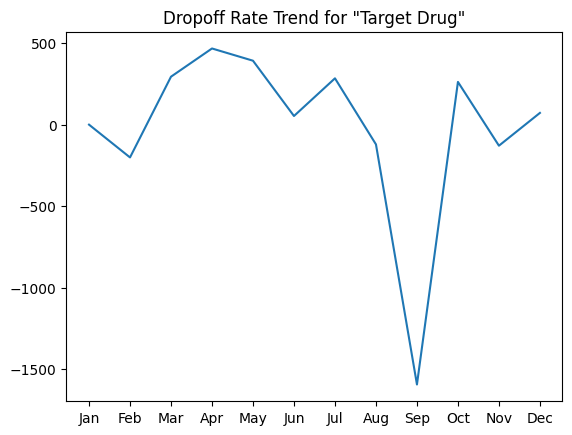

In [13]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.plot(months, dropoff_rates)
plt.title('Dropoff Rate Trend for "Target Drug"')

In [14]:
dropoff_reasons = Target.groupby('Incident')['Patient-Uid'].nunique()
print(dropoff_reasons)    

Incident
TARGET DRUG    9374
Name: Patient-Uid, dtype: int64


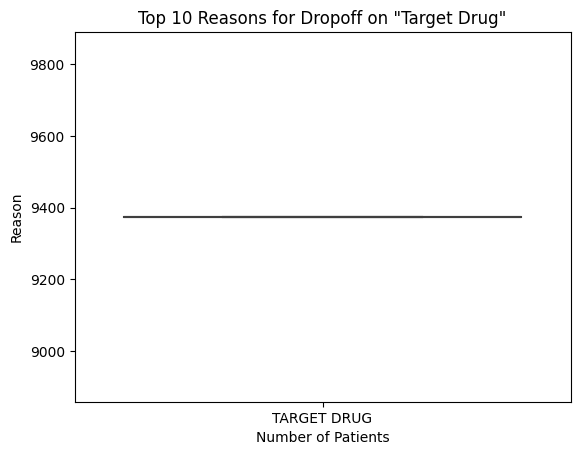

In [18]:
top_reasons = dropoff_reasons.head(10)
sns.boxplot(data = df, x=top_reasons.index, y= top_reasons.values)
plt.title('Top 10 Reasons for Dropoff on "Target Drug"')
plt.xlabel('Number of Patients')
plt.ylabel('Reason')
plt.show()

In [21]:
monthly_reasons = Target.groupby(['Month', 'Incident'])['Patient-Uid'].nunique().reset_index()
monthly_reasons

,Month,Incident,Patient-Uid
0,1,TARGET DRUG,3882
1,2,TARGET DRUG,3681
2,3,TARGET DRUG,3975
3,4,TARGET DRUG,4442
4,5,TARGET DRUG,4834
5,6,TARGET DRUG,4887
6,7,TARGET DRUG,5171
7,8,TARGET DRUG,5050
8,9,TARGET DRUG,3457
9,10,TARGET DRUG,3719


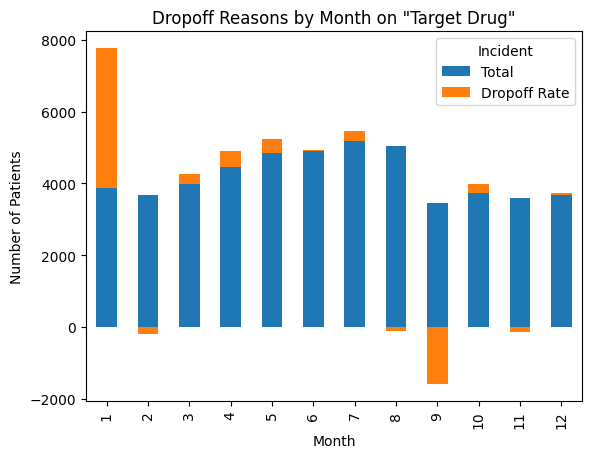

In [19]:
monthly_reasons = monthly_reasons.pivot(index='Month', columns='Incident', values='Patient-Uid').fillna(0)
monthly_reasons['Total'] = monthly_reasons.sum(axis=1)
monthly_reasons['Dropoff Rate'] = monthly_reasons['Total'].diff().fillna(monthly_reasons['Total'])
monthly_reasons = monthly_reasons.drop(columns=['TARGET DRUG'])
monthly_reasons.plot(kind='bar', stacked=True)
plt.title('Dropoff Reasons by Month on "Target Drug"')
plt.xlabel('Month')
plt.ylabel('Number of Patients')
plt.show()